# Анализ платежей и продуктов

## 1. Изучите распределение типов оплаты и их влияние на успешность сделок.

In [46]:
import pandas as pd

deals_df = pd.read_pickle("deals_cleaned_v3.pkl")

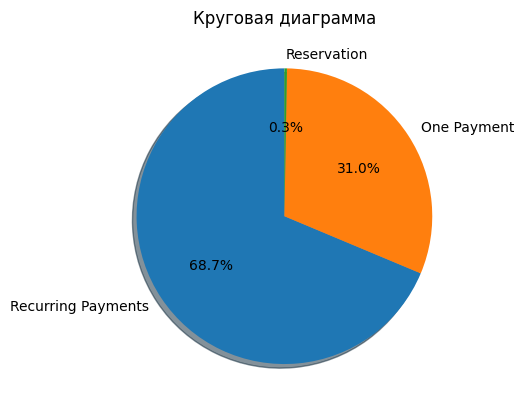

In [61]:
# Отфильтровываем только успешные сделки
successful_deals_df = deals_df[(deals_df['Stage'] == 'Payment Done')]
s_payment_counts = successful_deals_df['Payment Type'].value_counts()

labels = s_payment_counts.index
sizes = s_payment_counts.values

# explode = (0, 0.1, 0.2, 0) # выделяем второй сектор
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Круговая диаграмма")
# plt.axis('equal')  # чтобы круг не был овальным
plt.show()

In [ ]:
# successful_counts = deals_df[deals_df['Stage'] == 'Payment Done'].groupby('Payment Type').size()

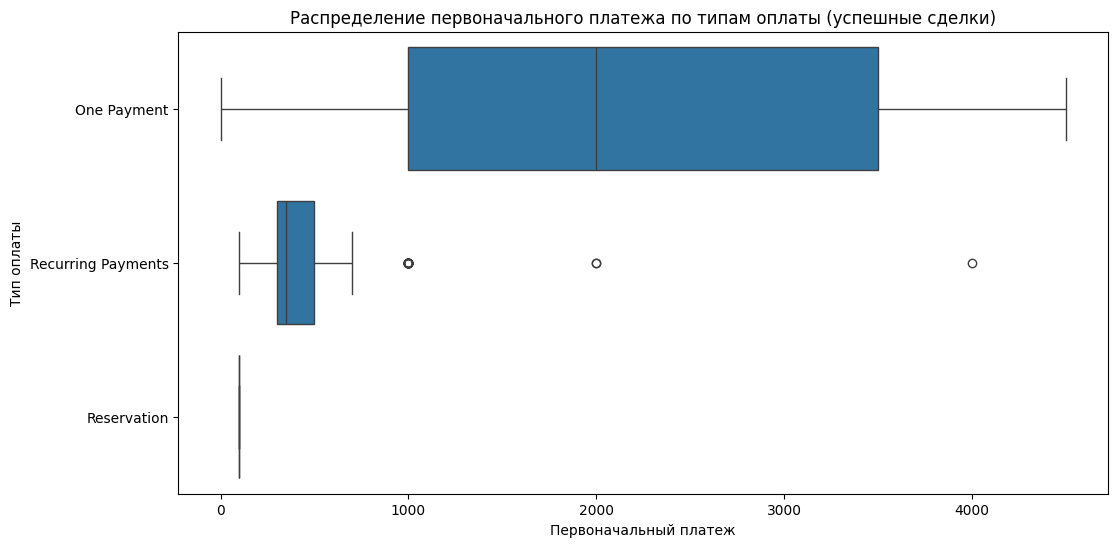

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Initial Amount Paid', y='Payment Type', data=successful_deals_df, orient='h')
plt.title('Распределение первоначального платежа по типам оплаты (успешные сделки)')
plt.xlabel('Первоначальный платеж')
plt.ylabel('Тип оплаты')
plt.show()

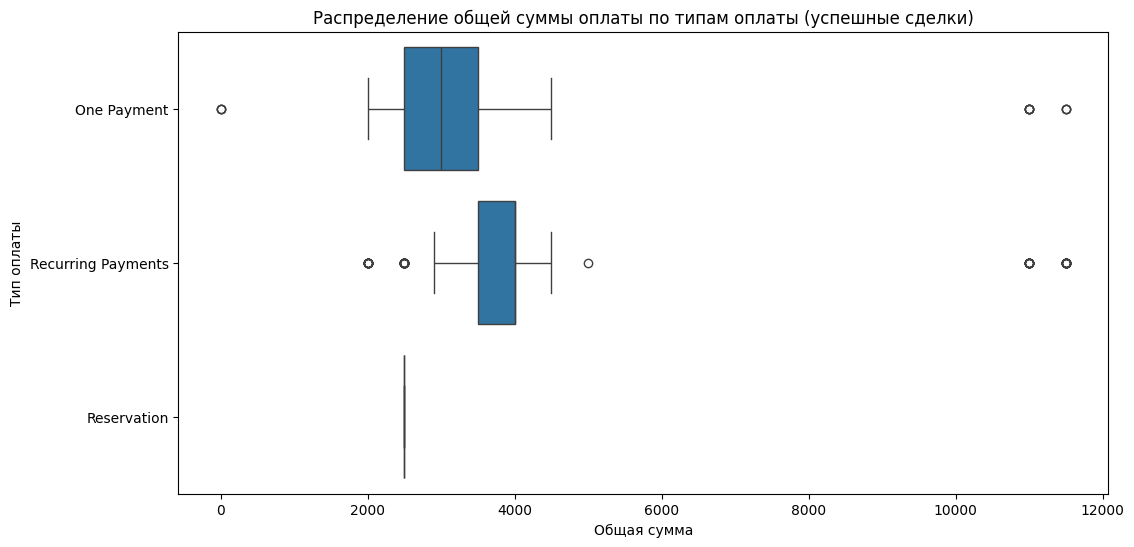

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Offer Total Amount', y='Payment Type', data=successful_deals_df, orient='h')
plt.title('Распределение общей суммы оплаты по типам оплаты (успешные сделки)')
plt.xlabel('Общая сумма')
plt.ylabel('Тип оплаты')
plt.show()

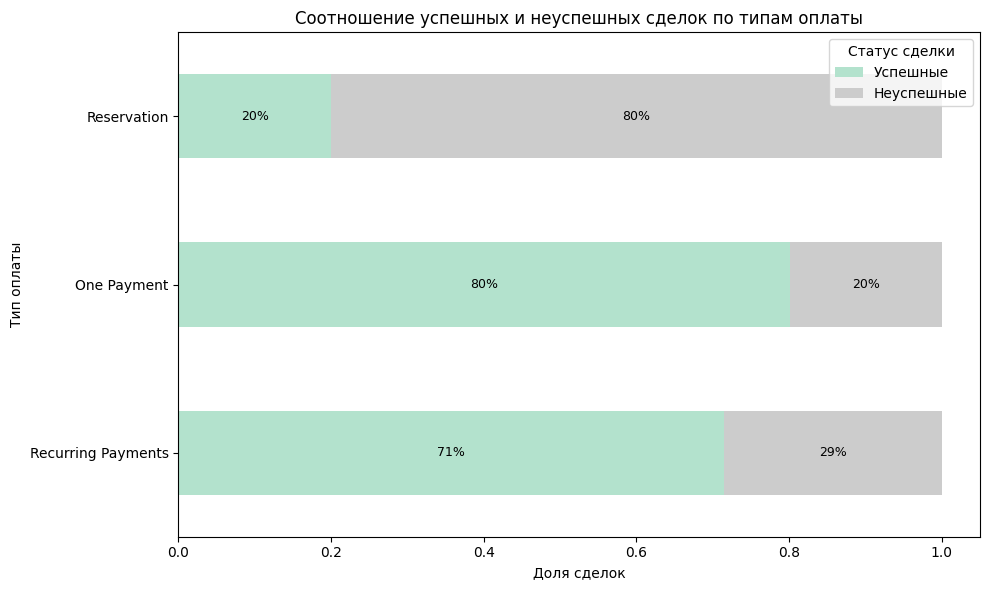

In [55]:
import matplotlib.pyplot as plt
# Подсчёт по типам оплаты и успешности
# success_counts = deals_df[deals_df['Stage'] == 'Payment Done']['Payment Type'].value_counts()
fail_counts = deals_df[deals_df['Stage'] != 'Payment Done']['Payment Type'].value_counts()

# Объединяем
all_types = s_payment_counts.index.union(fail_counts.index)
stacked_df = pd.DataFrame({
    'Успешные': s_payment_counts.reindex(all_types, fill_value=0),
    'Неуспешные': fail_counts.reindex(all_types, fill_value=0)
})

# Доли
stacked_df_ratio = stacked_df.div(stacked_df.sum(axis=1), axis=0)
# Построение графика
ax = stacked_df_ratio.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    colormap='Pastel2'
)

plt.title('Соотношение успешных и неуспешных сделок по типам оплаты')
plt.xlabel('Доля сделок')
plt.ylabel('Тип оплаты')
plt.legend(title='Статус сделки')

# Добавление процентов на график
for i, (idx, row) in enumerate(stacked_df_ratio.iterrows()):
    left = 0
    for status in ['Успешные', 'Неуспешные']:
        value = row[status]
        if value > 0.02:  # Подписывать только сегменты больше 2%
            ax.text(left + value / 2, i, f"{value:.0%}", va='center', ha='center', fontsize=9)
        left += value

plt.tight_layout()
plt.show()

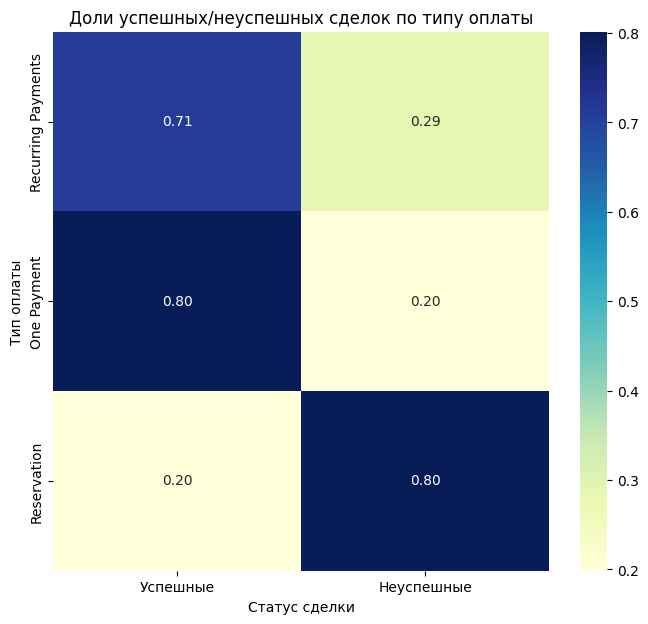

In [60]:
# Сводная таблица
heatmap_data = pd.DataFrame({
    'Успешные': s_payment_counts,
    'Неуспешные': fail_counts
}).fillna(0)

# Преобразуем в доли
heatmap_ratio = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Построение тепловой карты
plt.figure(figsize=(8, 7))
sns.heatmap(heatmap_ratio, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Доли успешных/неуспешных сделок по типу оплаты')
plt.xlabel('Статус сделки')
plt.ylabel('Тип оплаты')
plt.show()

## 2. Проанализируйте популярность и успешность различных продуктов и типов обучения.

In [25]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21411 entries, 0 to 21410
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Id                    21411 non-null  object         
 1   Deal Owner Name       21382 non-null  object         
 2   Closing Date          16685 non-null  datetime64[ns] 
 3   Quality               21411 non-null  category       
 4   Stage                 21411 non-null  category       
 5   Lost Reason           15942 non-null  category       
 6   Page                  20342 non-null  object         
 7   Campaign              16006 non-null  category       
 8   SLA                   15504 non-null  timedelta64[ns]
 9   Content               14101 non-null  object         
 10  Term                  12387 non-null  object         
 11  Source                21411 non-null  object         
 12  Payment Type          496 non-null    category       
 13  P

In [71]:
# Популярность (количество сделок) по продуктам и типам обучения:
popularity_prod_type = deals_df.groupby(['Product', 'Education Type'], observed=False).size().reset_index(name='deal_count')
print(popularity_prod_type)

               Product Education Type  deal_count
0       Data Analytics        Evening           0
1       Data Analytics        Morning           0
2    Digital Marketing        Evening         250
3    Digital Marketing        Morning        1533
4  Find yourself in IT        Evening           0
5  Find yourself in IT        Morning           0
6         UX/UI Design        Evening         153
7         UX/UI Design        Morning         808
8        Web Developer        Evening           1
9        Web Developer        Morning         545


In [72]:
# Успешность (количество сделок) по продуктам и типам обучения:
successfully_prod_type = successful_deals_df.groupby(['Product', 'Education Type'], observed=False).size().reset_index(name='deal_count')
print(successfully_prod_type)

               Product Education Type  deal_count
0       Data Analytics        Evening           0
1       Data Analytics        Morning           0
2    Digital Marketing        Evening         113
3    Digital Marketing        Morning         354
4  Find yourself in IT        Evening           0
5  Find yourself in IT        Morning           0
6         UX/UI Design        Evening          58
7         UX/UI Design        Morning         171
8        Web Developer        Evening           0
9        Web Developer        Morning         137


In [73]:
# Популярность (количество сделок) по продуктам
popularity_prod = deals_df.groupby(['Product'], observed=False).size().reset_index(name='deal_count')
print(popularity_prod)

               Product  deal_count
0       Data Analytics           1
1    Digital Marketing        1990
2  Find yourself in IT           4
3         UX/UI Design        1022
4        Web Developer         575


In [74]:
# Успешность (количество сделок) по продуктам :
successfully_prod = successful_deals_df.groupby(['Product'], observed=False).size().reset_index(name='deal_count')
print(successfully_prod)

               Product  deal_count
0       Data Analytics           0
1    Digital Marketing         474
2  Find yourself in IT           1
3         UX/UI Design         229
4        Web Developer         137


In [75]:
# Популярность (количество сделок) по  типам обучения:
popularity_type = deals_df.groupby(['Education Type'], observed=False).size().reset_index(name='deal_count')
print(popularity_type)

  Education Type  deal_count
0        Evening         404
1        Morning        2895


In [76]:
# Успешность (количество сделок) по  типам обучения
successfully_type = successful_deals_df.groupby(['Education Type'], observed=False).size().reset_index(name='deal_count')
print(successfully_type)

  Education Type  deal_count
0        Evening         171
1        Morning         662


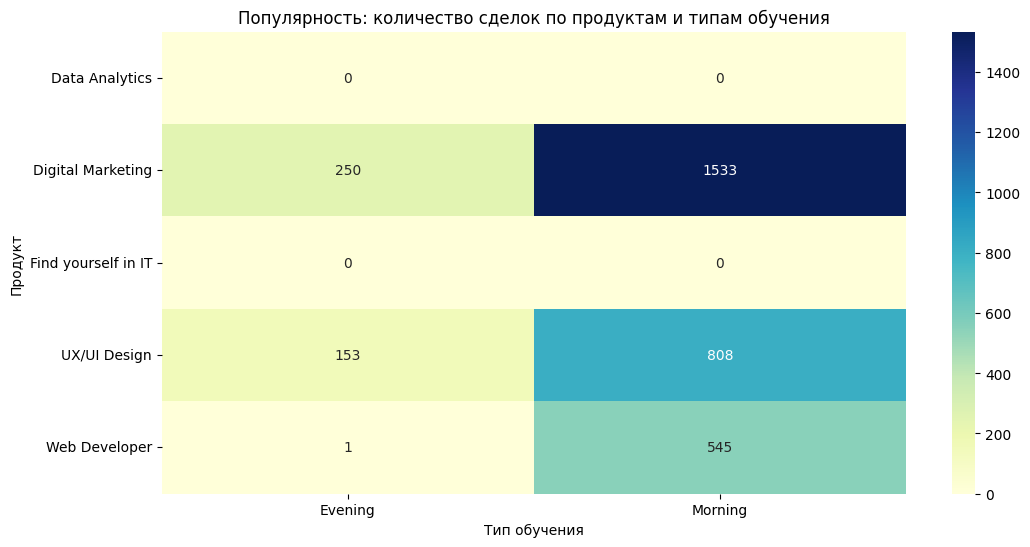

In [78]:
pivot_popularity = popularity_prod_type.pivot(index='Product', columns='Education Type', values='deal_count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_popularity, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Популярность: количество сделок по продуктам и типам обучения')
plt.xlabel('Тип обучения')
plt.ylabel('Продукт')
plt.show()

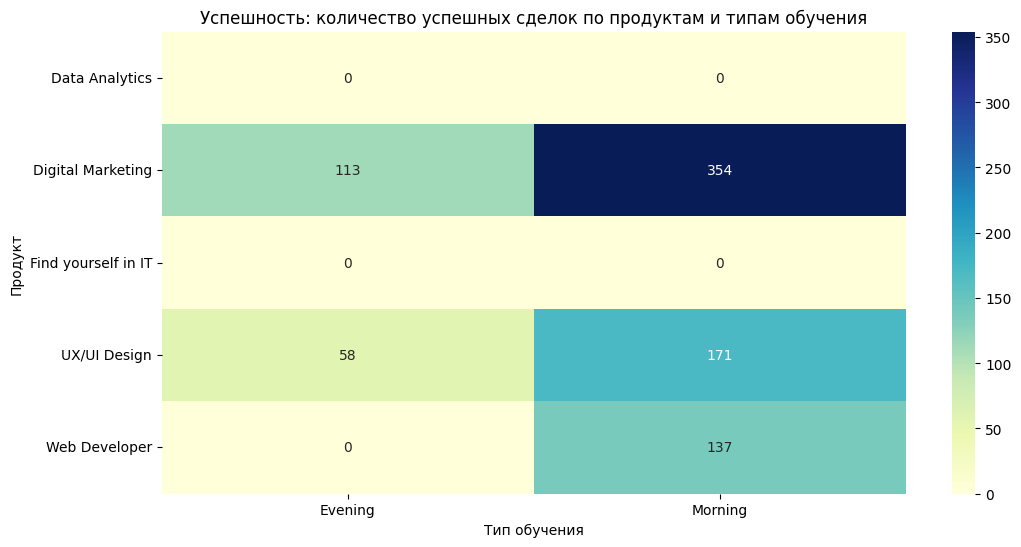

In [83]:
pivot_successfully = successfully_prod_type.pivot(index='Product', columns='Education Type', values='deal_count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_successfully, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Успешность: количество успешных сделок по продуктам и типам обучения')
plt.xlabel('Тип обучения')
plt.ylabel('Продукт')
plt.show()

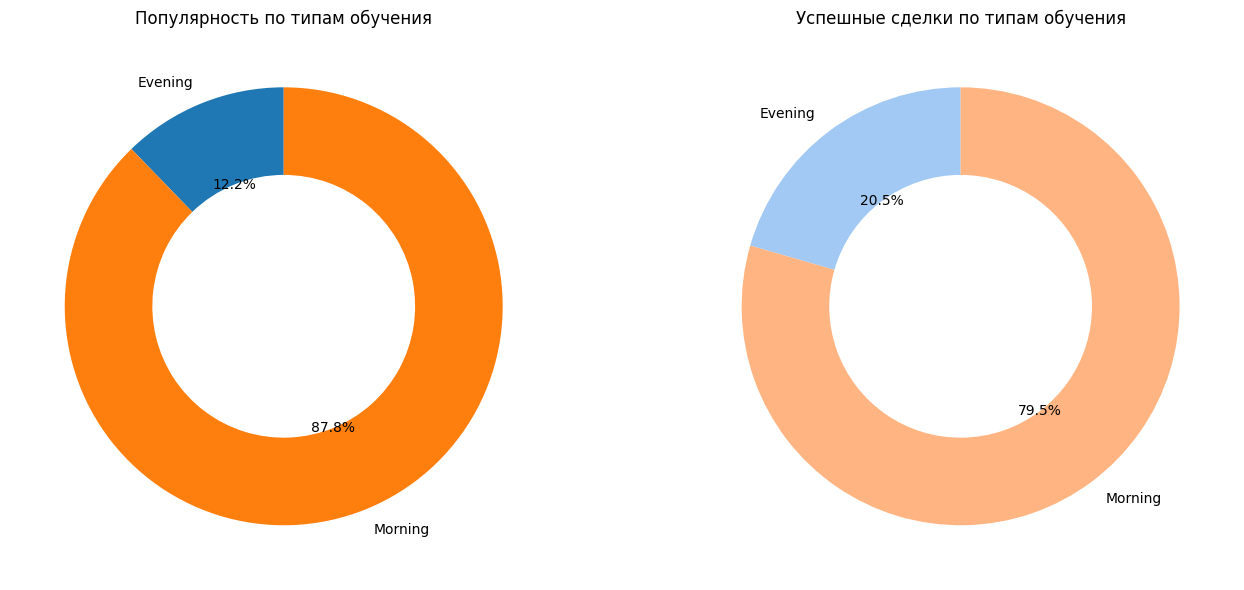

In [80]:
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Популярность
axs[0].pie(popularity_type['deal_count'], labels=popularity_type['Education Type'],
           autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
axs[0].set_title('Популярность по типам обучения')

# Успешность
axs[1].pie(successfully_type['deal_count'], labels=successfully_type['Education Type'],
           autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=sns.color_palette('pastel'))
axs[1].set_title('Успешные сделки по типам обучения')

plt.tight_layout()
plt.show()

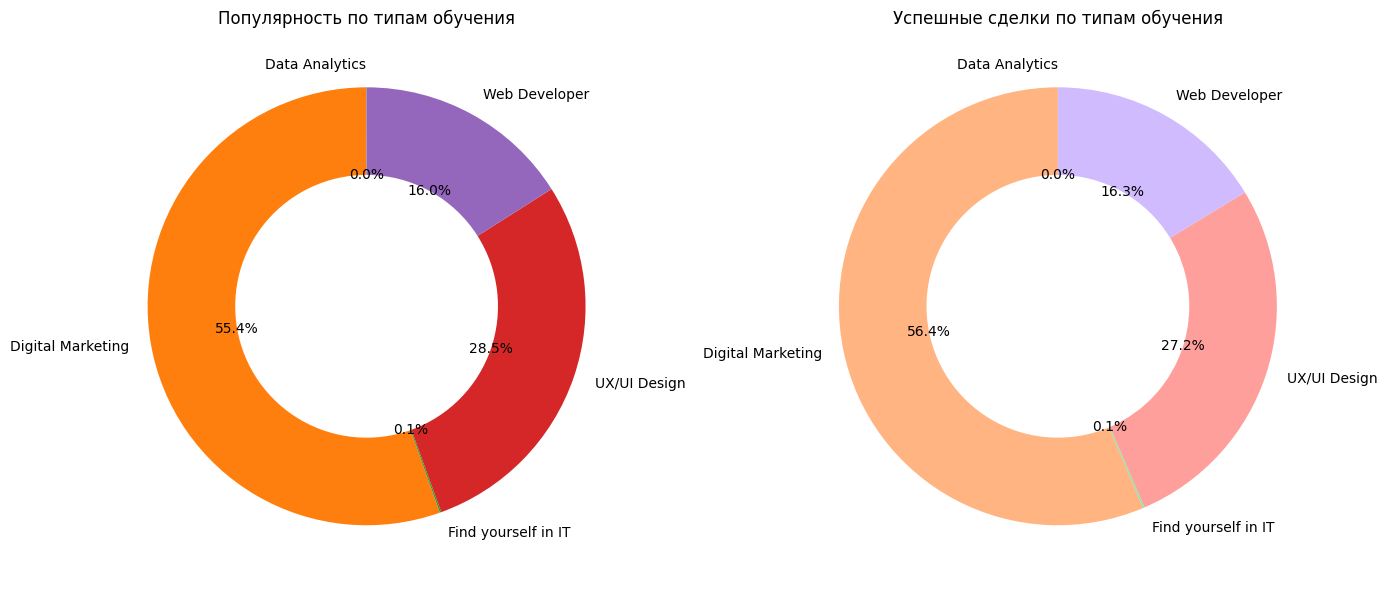

In [82]:
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Популярность
axs[0].pie(popularity_prod['deal_count'], labels=popularity_prod['Product'],
           autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
axs[0].set_title('Популярность по продукту')

# Успешность
axs[1].pie(successfully_prod['deal_count'], labels=successfully_prod['Product'],
           autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=sns.color_palette('pastel'))
axs[1].set_title('Успешные сделки по продукту')

plt.tight_layout()
plt.show()